In [1]:
#Credit Card Fraud Detection Project Using Machine Learning

In [2]:
#Step 1: Import Required Libraries

# Core numerical & data handling libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [3]:
#Step 2 : Load Dataset
# Load the dataset

data = pd.read_csv(r"C:\Users\DeLL\Documents\ML_internship_Projects\Credit_card_fraud\fraudTest.csv")


# Display first 5 rows
data.head()



,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


is_fraud
0    553574
1      2145
Name: count, dtype: int64


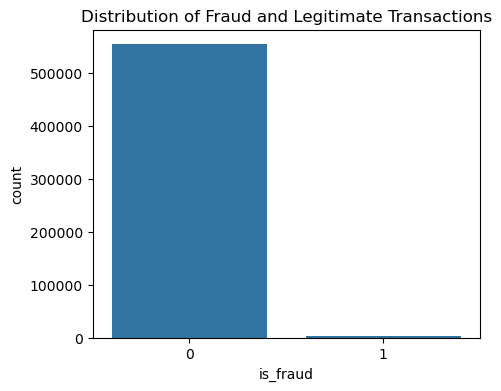

In [5]:
print(data['is_fraud'].value_counts())

plt.figure(figsize=(5,4))
sns.countplot(x='is_fraud', data=data)
plt.title("Distribution of Fraud and Legitimate Transactions")
plt.show()


In [6]:
columns_to_drop = [
    'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last',
    'street', 'city', 'state', 'job', 'dob', 'trans_num', 'unix_time'
]

data.drop(columns=columns_to_drop, inplace=True)


In [7]:
data = pd.get_dummies(data, drop_first=True)

print("Shape after encoding:", data.shape)


Shape after encoding: (555719, 23)


In [8]:
scaler = StandardScaler()
data['amt'] = scaler.fit_transform(data[['amt']])


In [9]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [11]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_predictions = log_model.predict(X_test)

print("Logistic Regression Performance\n")
print(classification_report(y_test, log_predictions))


Logistic Regression Performance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    138394
           1       0.00      0.00      0.00       536

    accuracy                           1.00    138930
   macro avg       0.50      0.50      0.50    138930
weighted avg       0.99      1.00      0.99    138930



In [12]:
dt_model = DecisionTreeClassifier(
    max_depth=6,
    random_state=42
)

dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

print("Decision Tree Performance\n")
print(classification_report(y_test, dt_predictions))


Decision Tree Performance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    138394
           1       0.74      0.59      0.66       536

    accuracy                           1.00    138930
   macro avg       0.87      0.80      0.83    138930
weighted avg       1.00      1.00      1.00    138930



In [13]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Random Forest Performance\n")
print(classification_report(y_test, rf_predictions))


Random Forest Performance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    138394
           1       0.90      0.15      0.25       536

    accuracy                           1.00    138930
   macro avg       0.95      0.57      0.62    138930
weighted avg       1.00      1.00      1.00    138930



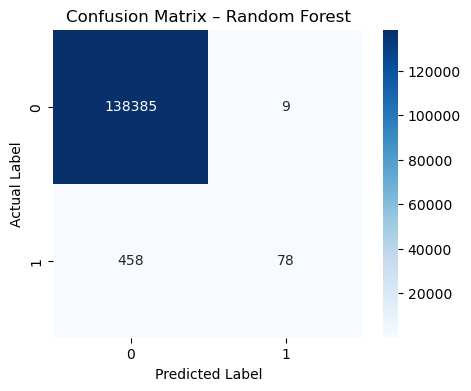

In [14]:
cm = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix – Random Forest")
plt.show()


In [15]:
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, rf_probabilities)

print("ROC–AUC Score:", roc_score)


ROC–AUC Score: 0.9624547905514841


In [16]:
sample_transaction = X_test.iloc[[0]]
prediction = rf_model.predict(sample_transaction)

if prediction[0] == 1:
    print("Fraudulent transaction detected")
else:
    print("Legitimate transaction")


Legitimate transaction
